<a href="https://colab.research.google.com/github/rag09reddy/Digit_classification/blob/main/CNN_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.activations import linear, relu, sigmoid

from tensorflow.keras.utils import to_categorical

from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Kaggle/train.csv")
test  = pd.read_csv("/content/drive/MyDrive/Kaggle/test.csv")


In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


Here we are assigin the results as Y_train. As the results in the csv file are named under the column "label"

Next in the Y_train we are droping that single label column. "axis = 1" shows that we are droping the column. "if axis = 0" then we are dropping the row

In [ ]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

In [ ]:
print(Y_train)
print(X_train)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       

In [ ]:
del train

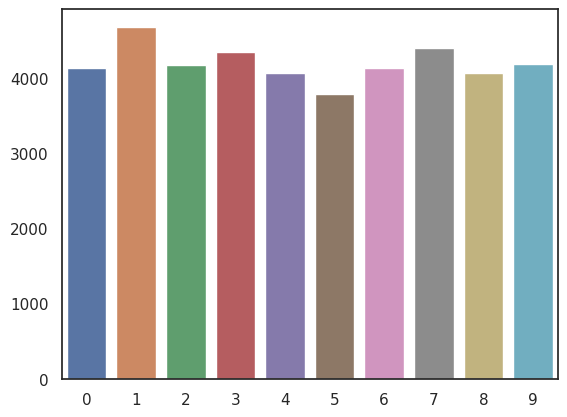

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
sns.set(style='white', context='notebook', palette='deep')

value_counts = Y_train.value_counts()
g = sns.barplot(x=value_counts.index, y=value_counts.values)
plt.show()
value_counts

In [ ]:
X_train.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

Nrmalizing the Data now the pixel value can range between 0 to 255, but after normalization it will be between 0 and 1

In [ ]:
X_train = X_train/255.0
test = test/255.0

Now the Data is in the form of 1D array, i.e it has total 42000 Images and the each Image is us a single row which has 784 columns, which represent its pixel values, So we are reshapping it into 3D vector, (-1, 28, 28, 1).

-1 = This represnts we are keeping the number of rows same i.e we are not altering it
28 x 28 = Each Image that pixel size
1 = For grey channels we use 1, if it was RGB we use 3

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Label Encoding to one hot Vector (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
                                 (ex : 3 -> [0,0,0,1,0,0,0,0,0,0])

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 10)


Here I will be using the Normal Neuarl network to solve the problem first as shown in the second exercise of the ML class

Splitting the tarining set into validation set


In [ ]:
random_seed = 2

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

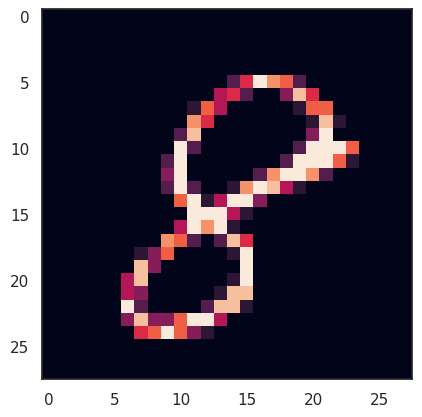

In [ ]:
g = plt.imshow(X_train[0][:,:,0])


Buiding the CNN Model

The Keras Sequential API is a convenient way to build neural networks layer by layer, starting from the input. In this architecture, you typically begin with a Convolutional (Conv2D) layer. This layer consists of learnable filters that transform parts of the input image using kernel filters. Each filter applies a matrix transformation across the entire image, effectively isolating features. You mentioned that you chose 32 filters for the first two Conv2D layers and 64 filters for the last two, which is a common configuration.

Pooling layers (MaxPool2D) are the second crucial component in CNNs. They act as downsampling filters by selecting the maximum value from neighboring pixels. This operation reduces computational cost and can help prevent overfitting. The pooling size determines how much downsampling occurs, with larger pooling sizes resulting in more significant downsampling.

By combining Convolutional and Pooling layers, CNNs can capture both local and global features within an image.

Dropout is a regularization technique that randomly deactivates a portion of nodes in a layer during each training sample. This process forces the network to learn features in a more distributed manner, ultimately improving generalization and reducing overfitting.

The 'relu' activation function (max(0, x)) introduces non-linearity into the network, allowing it to model complex relationships in the data.

The Flatten layer is crucial for converting the final feature maps into a 1D vector. This step is necessary to use fully connected (Dense) layers after convolutional and max-pooling layers. It essentially combines all the local features learned in previous layers.

Finally, you used two fully-connected (Dense) layers for classification, which function as artificial neural networks (ANN) classifiers. The last Dense layer (Dense(10, activation="softmax")) outputs a probability distribution for each class, indicating the likelihood of the input belonging to each class.

In summary, your CNN architecture starts with Convolutional layers to extract features, followed by Pooling layers for downsampling. Dropout is used for regularization, 'relu' for non-linearity, Flatten to convert features, and Dense layers for classification. The final output layer provides class probabilities using the softmax activation function.

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Choosing the Optimser, Compiler and the learning rate for the Model

In [ ]:
from keras.optimizers import RMSprop

# Define the optimizer with decay using the legacy optimizer
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile your model using this optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

**Data Agumentation**: To mitigate the overfitting problem in deep learning, it's common practice to employ data augmentation techniques. These techniques involve making artificial alterations to the training data while keeping the labels the same. The goal is to introduce variations that mimic real-world scenarios and help the model generalize better. Here are some key data augmentation approaches:

1. **Centering and Scaling**: Many handwritten digits may not be perfectly centered or may have varying sizes. You can apply transformations to center and scale the digits within the image.

2. **Rotation**: To account for variations in how people write digits, you can introduce random rotations to the images. This helps the model become robust to differently oriented digits.

3. **Grayscale**: Converting images to grayscale can make the model invariant to variations in color, as handwritten digits might have different ink shades.

4. **Flipping**: Horizontal and vertical flips can create new training samples by mirroring the existing ones. This can help the model learn features from different orientations.

5. **Random Crops**: Cropping parts of the image at random positions and sizes can simulate variations in how digits are written within a larger canvas.

6. **Color Jitter**: Introducing small variations in color, such as brightness and contrast adjustments, can make the model more resilient to differences in writing style.

7. **Translations**: Slight translations of the image (shifting it horizontally or vertically) can simulate variations in the position of the digit within the image.

8. **Noise Addition**: Adding random noise to the image can mimic imperfections in the writing or scanning process.

By applying a combination of these transformations to your existing dataset, you can significantly increase the effective size of your training data. This helps the model generalize better to unseen data and become more robust to various writing styles and conditions.

Data augmentation is a powerful tool for improving the performance of deep learning models, especially when you have limited labeled data. It allows you to create a more diverse and representative training dataset, reducing the risk of overfitting and improving the model's ability to handle real-world variations in the data.

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
 #Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

<ipython-input-47-2ac951b01d79>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


439/439 - 159s - loss: 0.9447 - accuracy: 0.6792 - val_loss: 0.2052 - val_accuracy: 0.9348 - lr: 0.0010 - 159s/epoch - 362ms/step


**Evaluating the model**

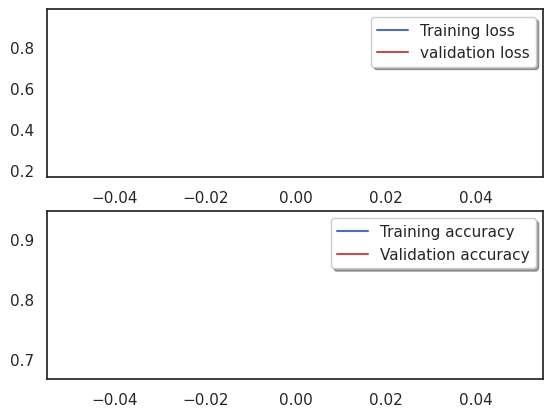

In [ ]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.legend(loc='best', shadow=True)


**Confusion Matrix** : Confusion matrix can be very helpfull to see your model drawbacks.

132/132 [==============================] - 5s 34ms/step


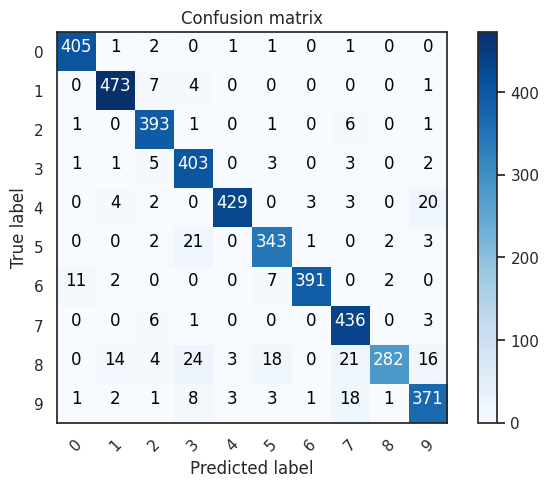

In [ ]:
# Look at confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 43s 49ms/step


In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
file_path = '/content/drive/MyDrive/Kaggle/prediction_CNN_1.csv'

submission.to_csv(file_path,index=False)

***NOw testing the CNN with Epochs: 25, to show the accuracy of the Model***

In [ ]:
epochs = 25 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

**Data Agumentation**: To mitigate the overfitting problem in deep learning, it's common practice to employ data augmentation techniques. These techniques involve making artificial alterations to the training data while keeping the labels the same. The goal is to introduce variations that mimic real-world scenarios and help the model generalize better. Here are some key data augmentation approaches:

1. **Centering and Scaling**: Many handwritten digits may not be perfectly centered or may have varying sizes. You can apply transformations to center and scale the digits within the image.

2. **Rotation**: To account for variations in how people write digits, you can introduce random rotations to the images. This helps the model become robust to differently oriented digits.

3. **Grayscale**: Converting images to grayscale can make the model invariant to variations in color, as handwritten digits might have different ink shades.

4. **Flipping**: Horizontal and vertical flips can create new training samples by mirroring the existing ones. This can help the model learn features from different orientations.

5. **Random Crops**: Cropping parts of the image at random positions and sizes can simulate variations in how digits are written within a larger canvas.

6. **Color Jitter**: Introducing small variations in color, such as brightness and contrast adjustments, can make the model more resilient to differences in writing style.

7. **Translations**: Slight translations of the image (shifting it horizontally or vertically) can simulate variations in the position of the digit within the image.

8. **Noise Addition**: Adding random noise to the image can mimic imperfections in the writing or scanning process.

By applying a combination of these transformations to your existing dataset, you can significantly increase the effective size of your training data. This helps the model generalize better to unseen data and become more robust to various writing styles and conditions.

Data augmentation is a powerful tool for improving the performance of deep learning models, especially when you have limited labeled data. It allows you to create a more diverse and representative training dataset, reducing the risk of overfitting and improving the model's ability to handle real-world variations in the data.

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
 #Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/25


<ipython-input-57-2ac951b01d79>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


439/439 - 151s - loss: 0.3062 - accuracy: 0.9064 - val_loss: 0.1124 - val_accuracy: 0.9664 - lr: 0.0010 - 151s/epoch - 345ms/step
Epoch 2/25


439/439 - 153s - loss: 0.2123 - accuracy: 0.9358 - val_loss: 0.0941 - val_accuracy: 0.9686 - lr: 0.0010 - 153s/epoch - 349ms/step
Epoch 3/25


439/439 - 151s - loss: 0.1710 - accuracy: 0.9494 - val_loss: 0.0728 - val_accuracy: 0.9767 - lr: 0.0010 - 151s/epoch - 343ms/step
Epoch 4/25


439/439 - 150s - loss: 0.1490 - accuracy: 0.9566 - val_loss: 0.0600 - val_accuracy: 0.9824 - lr: 0.0010 - 150s/epoch - 343ms/step
Epoch 5/25


439/439 - 151s - loss: 0.1277 - accuracy: 0.9620 - val_loss: 0.0510 - val_accuracy: 0.9829 - lr: 0.0010 - 151s/epoch - 344ms/step
Epoch 6/25


439/439 - 150s - loss: 0.1191 - accuracy: 0.9646 - val_loss: 0.0489 - val_accuracy: 0.9829 - lr: 0.0010 - 150s/epoch - 342ms/step
Epoch 7/25


439/439 - 151s - loss: 0.1132 - accuracy: 0.9667 - val_loss: 0.0442 - val_accuracy: 0.9862 - lr: 0.0010 - 151s/epoch - 344ms/step
Epoch 8/25


439/439 - 150s - loss: 0.1025 - accuracy: 0.9700 - val_loss: 0.0403 - val_accuracy: 0.9871 - lr: 0.0010 - 150s/epoch - 342ms/step
Epoch 9/25


439/439 - 150s - loss: 0.0997 - accuracy: 0.9710 - val_loss: 0.0363 - val_accuracy: 0.9890 - lr: 0.0010 - 150s/epoch - 341ms/step
Epoch 10/25


439/439 - 150s - loss: 0.0929 - accuracy: 0.9731 - val_loss: 0.0443 - val_accuracy: 0.9881 - lr: 0.0010 - 150s/epoch - 341ms/step
Epoch 11/25


439/439 - 151s - loss: 0.0944 - accuracy: 0.9731 - val_loss: 0.0360 - val_accuracy: 0.9900 - lr: 0.0010 - 151s/epoch - 344ms/step
Epoch 12/25


439/439 - 149s - loss: 0.0941 - accuracy: 0.9734 - val_loss: 0.0345 - val_accuracy: 0.9886 - lr: 0.0010 - 149s/epoch - 340ms/step
Epoch 13/25


439/439 - 147s - loss: 0.0943 - accuracy: 0.9733 - val_loss: 0.0341 - val_accuracy: 0.9883 - lr: 0.0010 - 147s/epoch - 335ms/step
Epoch 14/25


439/439 - 147s - loss: 0.0927 - accuracy: 0.9747 - val_loss: 0.0368 - val_accuracy: 0.9876 - lr: 0.0010 - 147s/epoch - 336ms/step
Epoch 15/25


439/439 - 147s - loss: 0.0917 - accuracy: 0.9737 - val_loss: 0.0361 - val_accuracy: 0.9893 - lr: 0.0010 - 147s/epoch - 336ms/step
Epoch 16/25


439/439 - 147s - loss: 0.0939 - accuracy: 0.9741 - val_loss: 0.0387 - val_accuracy: 0.9886 - lr: 0.0010 - 147s/epoch - 335ms/step
Epoch 17/25


439/439 - 148s - loss: 0.0899 - accuracy: 0.9744 - val_loss: 0.0295 - val_accuracy: 0.9912 - lr: 0.0010 - 148s/epoch - 338ms/step
Epoch 18/25


439/439 - 148s - loss: 0.0935 - accuracy: 0.9745 - val_loss: 0.0440 - val_accuracy: 0.9869 - lr: 0.0010 - 148s/epoch - 337ms/step
Epoch 19/25


439/439 - 148s - loss: 0.0859 - accuracy: 0.9758 - val_loss: 0.0364 - val_accuracy: 0.9900 - lr: 0.0010 - 148s/epoch - 337ms/step
Epoch 20/25


439/439 - 148s - loss: 0.0906 - accuracy: 0.9758 - val_loss: 0.0405 - val_accuracy: 0.9883 - lr: 0.0010 - 148s/epoch - 336ms/step
Epoch 21/25


439/439 - 147s - loss: 0.0921 - accuracy: 0.9752 - val_loss: 0.0335 - val_accuracy: 0.9898 - lr: 0.0010 - 147s/epoch - 335ms/step
Epoch 22/25


439/439 - 148s - loss: 0.0933 - accuracy: 0.9749 - val_loss: 0.0405 - val_accuracy: 0.9888 - lr: 0.0010 - 148s/epoch - 336ms/step
Epoch 23/25


439/439 - 149s - loss: 0.0907 - accuracy: 0.9758 - val_loss: 0.0356 - val_accuracy: 0.9893 - lr: 0.0010 - 149s/epoch - 339ms/step
Epoch 24/25


439/439 - 148s - loss: 0.0897 - accuracy: 0.9758 - val_loss: 0.0328 - val_accuracy: 0.9902 - lr: 0.0010 - 148s/epoch - 338ms/step
Epoch 25/25


439/439 - 149s - loss: 0.0942 - accuracy: 0.9755 - val_loss: 0.0338 - val_accuracy: 0.9907 - lr: 0.0010 - 149s/epoch - 340ms/step


**Evaluating the model**

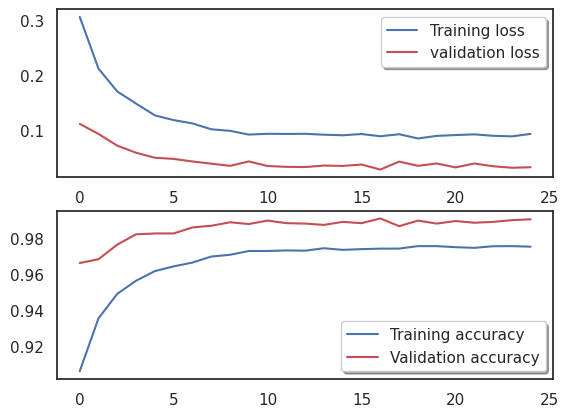

In [ ]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.legend(loc='best', shadow=True)


**Confusion Matrix** : Confusion matrix can be very helpfull to see your model drawbacks.

132/132 [==============================] - 4s 33ms/step


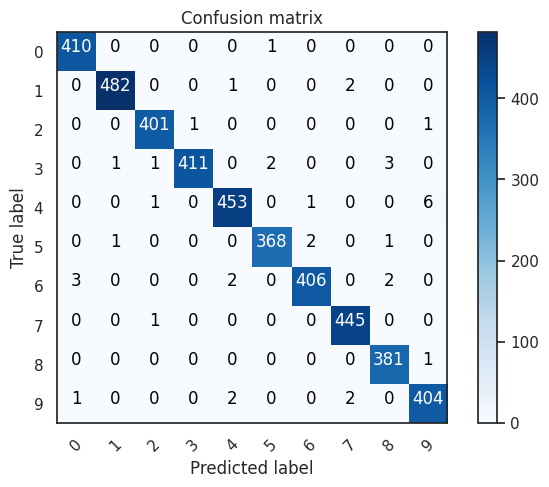

In [ ]:
# Look at confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 44s 51ms/step


In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
file_path = '/content/drive/MyDrive/Kaggle/prediction_CNN_2.csv'

submission.to_csv(file_path,index=False)